# Homework (19 pts) - Hypothesis Testing

1. You measure the duration of high frequency bursts of action potentials under two different experimental conditions (call them conditions A and B). Based on your measured data below, determine if the conditions affect the mean burst duration or if differences are just due to random fluctuations? See 1a-d below.

In [91]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
burstDurationsA_ms = np.array([180.38809356, 118.54316518,  47.36070342, 258.43152543,
       157.58441772,  53.00241256,  97.87549106,  98.58339172,
         3.82151168, 149.63437886,  78.36434292, 207.1499196 ,
       249.99308288,  52.33575872, 177.16295745,  20.90902826,
       355.53831638,  17.14676607, 194.82448255, 364.30099202,
        10.46025411,  63.80995802, 186.96964679,  16.76391482,
        66.04825185, 169.95991378, 174.85051452,  95.51534595,
       164.81818483, 165.92316127,  21.99840476, 176.27450914,
       367.20238806,  53.55081561,  18.54310649, 309.36915353,
        34.8110391 , 170.70514854,   4.80755719, 185.70861565,
        42.81031454,  77.63480453,  22.78673497,  27.15480627,
        81.19289909,   7.5754338 , 143.53588895,   1.45355329,
        56.93153072,  35.7227909 , 120.88947208, 268.68459917,
        36.56451611, 335.29492244,  18.88246351, 698.21607381,
        47.24456065,  68.47935918, 246.50352868,  39.17939247,
       130.00962739,  12.63485608,  16.5060213 ,  85.73872575,
        30.34193446,  12.18596266, 133.13145381,  39.68448593,
       227.5104642 , 274.45272375, 167.76767172,  23.93871685,
       319.05649273,   6.3491122 ,  35.14797547, 170.29631475,
        33.54342976,   2.71282041, 134.5042415 ,  42.498552  ,
       144.87658813, 122.78633957,  46.58727698, 143.74260009,
        27.95191179, 462.66535543, 187.17111074,  21.05730056,
        27.92875799,  73.0405984 , 137.67114744,  25.51076087,
        68.71066451, 188.46823412,  20.58525518,  18.06289499,
       388.79209834,   9.42246312, 270.11609469,  20.51123798])
burstDurationsB_ms = np.array([ 19.1579061 , 103.28099491, 155.40048778,  54.00532297,
        19.60552475,  38.33218511, 172.39377537, 100.60095889,
       123.39067736,  32.30752807, 140.81577413,  10.03036383,
        76.95250023, 111.4112118 , 106.77958145, 100.03741994,
        54.40736747, 169.72641863, 170.51048794,  84.31738796,
        32.48573515,  71.14968724,  18.07487628,  48.27775752,
       249.00817236,  40.88078534, 149.55876359, 171.68318734,
        64.7972247 , 179.67199065, 211.24354393,  49.54367304,
         5.97816835, 270.82356699,  99.33133967,  14.35603709,
        61.8917307 ,  48.13722571,  65.23703418, 119.95425274,
        64.3948595 ,  57.40459219,  18.76680104,  37.37173184,
       143.4622583 ,  21.6463496 ,  45.86107014,   3.98511098,
        11.8424448 , 105.59224929,  71.49909777,  29.64941255,
       117.62835465,  31.33284437, 124.17263642, 249.31437673,
        92.15958114,  66.2842341 ,   5.01333126,  18.53478564,
        44.09316335, 119.8752612 ,  52.31171617,   3.03888107,
       109.94031571,   5.52411681,  43.88839751,  48.63036147,
        22.71317076,  30.20052081,  32.10942778, 117.08796453,
        53.83369891,  68.82006208,  92.29204674,  93.829404  ,
         0.67985216,  10.42751195,   4.35827727, 127.21452508,
        42.69414115,  34.9520911 ,  20.16096766, 178.44190716,
        43.04340469,  89.11997718, 163.48474361, 277.29716851,
        17.08902205, 103.74782303,  49.29308393,  72.1459098 ,
        11.4600829 ,   4.09194418,  51.55511185,  91.81103802,
        31.36955782,  23.24407568,  90.13594215,  69.37118937])

1. a) (1 pt) State the null and alternative hypotheses.

Null: condition B has no effect on mean burst duration. 
alternative: condition B has an effect on mean burst duration beyond just random fluctuations. 

1. b) (3 ps) Plot the burst distributions for conditions A and B overlaid with your best estimate for the probability density function that describes them.

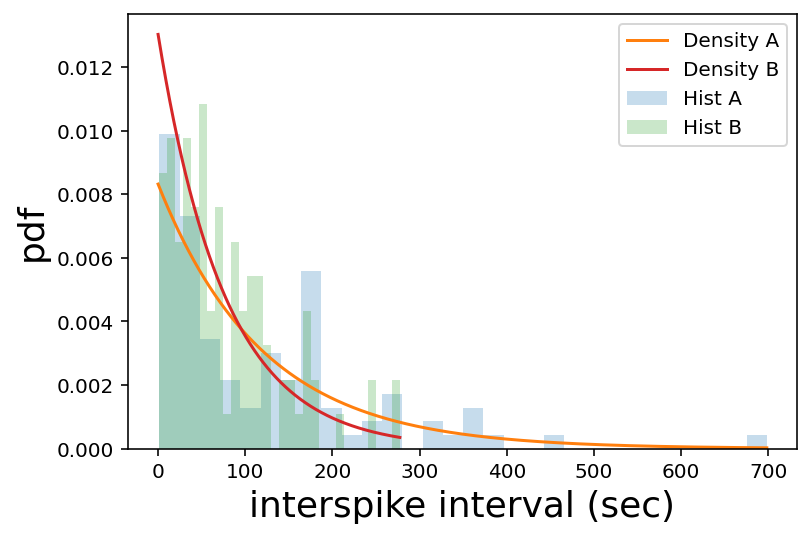

In [93]:
tauA = burstDurationsA_ms.mean()
bestMeanA = 1 / tauA

tauB = burstDurationsB_ms.mean()
bestMeanB = 1 / tauB

burstDurationADist = st.expon(loc=0, scale=1/bestMeanA)
burstDurationBDist = st.expon(loc=0, scale=1/bestMeanB)

# plot of A
supportA = np.arange(0, burstDurationsA_ms.max(), 0.01)
plt.hist(burstDurationsA_ms, bins=30, density=True, alpha=0.25, label='Hist A')
plt.plot(supportA, burstDurationADist.pdf(supportA), label='Density A')

# plot of B
supportB = np.arange(0, burstDurationsB_ms.max(), 0.01)
plt.hist(burstDurationsB_ms, bins=30, density=True, alpha=0.25, label='Hist B')
plt.plot(supportB, burstDurationBDist.pdf(supportB), label='Density B')
plt.xlabel('interspike interval (sec)')
plt.ylabel('pdf')
plt.legend();

1. c) (3 pts) Use a permutation test with 1000 permutations to test your null hypothesis. Compute the difference between mean burst durations for all 1000 permutations of the datasets.

In [94]:
wtTau_sec = burstDurationsA_ms.mean()
mtTau_sec = burstDurationsB_ms.mean()

measuredTauDiff = ATau_sec - BTau_sec

nA = len(burstDurationsA_ms)
nB = len(burstDurationsB_ms)
allOpenTimes = np.zeros((nA + nB,))
allOpenTimes[:nA] = burstDurationsA_ms
allOpenTimes[-nB:] = burstDurationsB_ms

In [95]:
numPermutations = 1000
permutedTauDiffs = np.zeros((numPermutations,))

for i in range(numPermutations):
    np.random.shuffle(allOpenTimes)
    
    burstDurationsA_ms = allOpenTimes[:nA]
    burstDurationsB_ms = allOpenTimes[-nB:]
    
    permutedTauDiffs[i] = burstDurationsA_ms.mean() - burstDurationsB_ms.mean()


1. d) (3 pts) Plot the distribtuion of mean burst time differences from each permutation and use vertical dashed lines ot indicate the 95% confidence interval and a vertical solid line to indicate the measured mean burst time difference between the actual datasets. Finally, answer the original question, do the conditions affect mean burst duration?

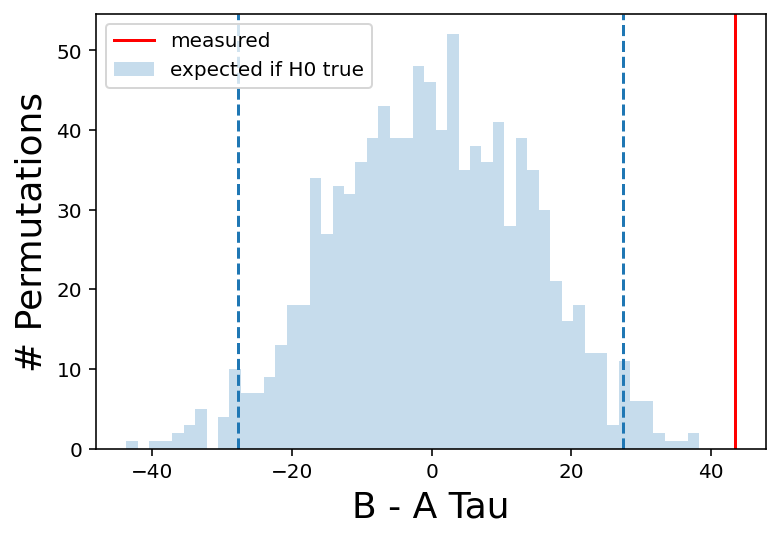

In [96]:
plt.hist(permutedTauDiffs, bins=50, alpha=0.25, label='expected if H0 true');

# add 95% confidence intervals to the plot
lb, ub = np.quantile(permutedTauDiffs, [0.025, 0.975])
plt.axvline(lb, linestyle='--')
plt.axvline(ub, linestyle='--');

# add the measured difference from the original datasets
plt.axvline(measuredTauDiff, color='r', label='measured')
plt.xlabel('B - A Tau')
plt.ylabel('# Permutations')
plt.legend();

The condition does affect the mean burst duration

2. You record the resting potential of a cell (see below). Based on your sample data, what is the maximum likelihood estimate for the mean and standard deviation of the cell's resting potential? See 2a-c below.

In [97]:
restingPotential_mV = np.array([-85.06885608, -68.0333149 , -77.04147864, -70.82636201,
       -73.11516394, -70.87124656, -69.8945143 , -71.35017797,
       -78.97700081, -76.06762065, -80.16301496, -75.53757879,
       -66.29208026, -84.46635021, -74.99594162, -81.64926101,
       -69.43971079, -60.09946296, -66.79822251, -60.85633766,
       -54.32637416, -66.45195357, -82.98456323, -81.95661922,
       -60.47209247, -80.55272128, -62.85999264, -86.59379859,
       -78.64488589, -68.84506935, -80.77647186, -67.85623328,
       -74.45114227, -89.65579119, -82.64751201, -63.75968145,
       -74.22283582, -59.31586296, -93.0908073 , -73.64374549,
       -62.68738212, -57.96506437, -72.3717666 , -86.33058942,
       -78.92751452, -58.80136699, -85.71378949, -57.19191734,
       -91.30229149, -75.05287933, -75.33300218, -62.74969485,
       -79.59156555, -52.61256484, -77.21434863, -83.18228806,
       -62.06267252, -68.56599363, -74.33860286, -74.25433867,
       -67.10062548, -70.91001388, -74.54319772, -89.15247536,
       -72.25311527, -88.42966306, -77.76328165, -68.46582471,
       -75.94389499, -58.47565688, -71.13726886, -82.4352595 ,
       -61.93586705, -83.83289675, -51.7473573 , -72.18052423,
       -77.19392687, -87.97762782, -68.17409172, -62.04925685,
       -72.86214908, -69.43243604, -82.89191418, -67.91943956,
       -59.00530849, -62.53955662, -68.66192422, -73.86176431,
       -63.33605874, -84.78928316, -79.38590405, -85.06698722,
       -77.99176887, -70.8097979 , -70.458364  , -77.83905415,
       -79.05549124, -67.7530506 , -86.29135786, -60.87285052,
       -68.75028368, -69.48216823, -87.97546221, -74.25401398,
       -72.00639248, -73.25242423, -99.49034043, -81.86020062,
       -78.38191113, -68.64333415, -62.26209287, -75.46279644,
       -82.18768283, -77.45752358, -79.82870353, -69.4572625 ,
       -78.32253067, -73.59782921, -72.25046001, -80.64590368,
       -76.92874101, -90.79517065, -73.90324566, -81.67875556,
       -67.59862905, -81.49491813, -75.79660561, -81.14508062,
       -78.95641057, -80.56089537, -80.23390812, -72.4244641 ,
       -87.47818531, -73.59907449, -66.92882851, -67.87048944,
       -69.79223622, -67.11253617, -64.8935525 , -80.52556846,
       -78.19259758, -62.10604477, -95.98603544, -75.95599522,
       -66.3355366 , -80.87436998, -81.5009947 , -88.22430255,
       -83.72971765, -75.86416506, -82.52663772, -53.76916602,
       -66.21196557, -72.93868097, -91.42283677, -80.22444843,
       -75.08391826, -52.05541454, -72.0154604 , -80.24943593,
       -65.97047566, -81.62631839, -73.18646105, -70.85923137,
       -66.05248632, -60.82923084, -59.49883812, -78.38967591,
       -84.79797173, -95.00305539, -78.06355062, -71.60393851,
       -70.37115932, -86.7155815 , -65.38955127, -76.78546928,
       -79.85586826, -76.65572665, -71.50214043, -83.65681821,
       -59.9250123 , -76.05986927, -82.68107711, -70.01703154,
       -74.46337865, -63.38903087, -78.73136431, -76.56253395,
       -72.43137511, -52.60067507, -54.23945626, -63.68117735,
       -88.19424095, -76.29322833, -77.01457066, -72.88256829,
       -67.46931905, -60.91331725, -79.17094879, -74.96126989])

2. a) (3 pts) You only have one sample (above) with a single mean. Use the Central Limit Theorem to estimate the distribution of mean resting potentials were you to collect a bunch more samples. Plot this distribution and indicate its 95% confidence interval with vertical lines on the plot.

Estimate of mean expression level per cell in population is -73.9 ± 1.3


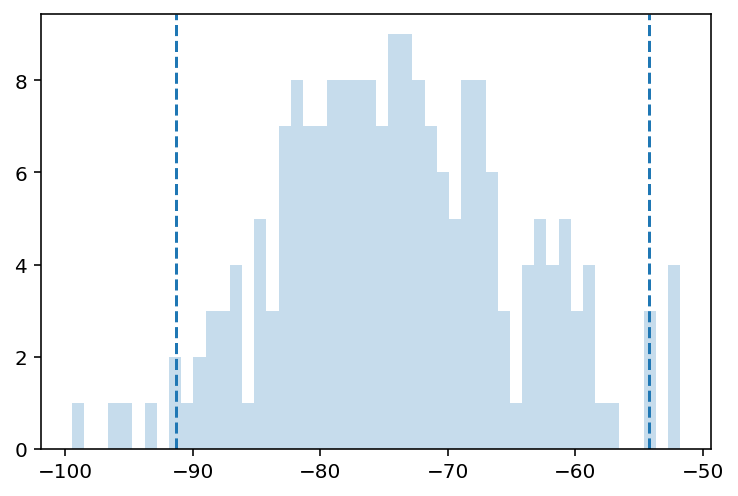

In [98]:
mean = np.mean(restingPotential_mV)
sd = np.std(restingPotential_mV)

sem = sd / np.sqrt(200)

print(f"Estimate of mean expression level per cell in population is {mean :.1f} ± {1.96 * sem :.1f}")

plt.hist(restingPotential_mV, bins=50, alpha=0.25, label='expected if H0 true');

# add 95% confidence intervals to the plot
lb, ub = np.quantile(restingPotential_mV, [0.025, 0.975])
plt.axvline(lb, linestyle='--')
plt.axvline(ub, linestyle='--');

2. b) (3 pts) Use 1000 bootstrapped samples to estimate the 95% confidence interval for the mean resting potential. Plot the distribution of bootstrap mean resting potentiaals and indicate the 95% confidence intervals with vertical lines. How do these compare to that obtained by the Central Limit Theorem?

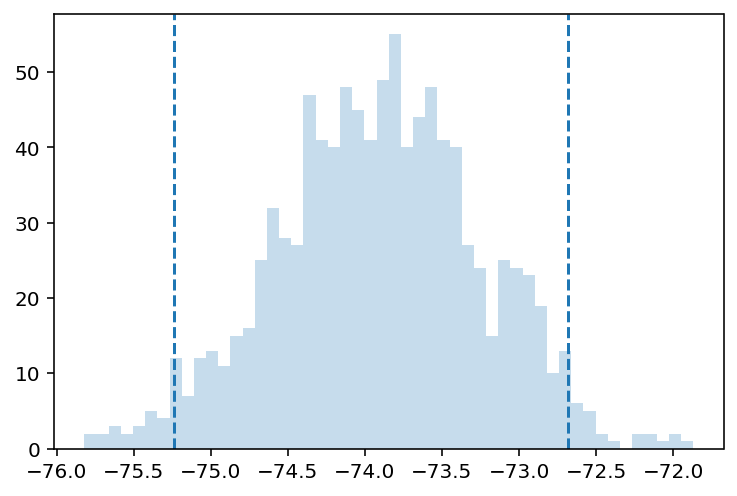

In [99]:
numBootstrapSamples = 1000

bootstrapMeans = np.zeros((numBootstrapSamples,))
bootstrapStdevs = np.zeros((numBootstrapSamples,))

for i in range(numBootstrapSamples):
    bootstrapSample = np.random.choice(restingPotential_mV, size = 200)
    bootstrapMeans[i] = bootstrapSample.mean()
    bootstrapStdevs[i] = bootstrapSample.std()

plt.hist(bootstrapMeans, bins=50, alpha=0.25)
lb, ub = np.quantile(bootstrapMeans, [0.025, 0.975])
plt.axvline(lb, linestyle='--')
plt.axvline(ub, linestyle='--');

2. c) (3 pts) Use a t-Test to determine whether this cell belongs to a set of cells that you previously determined have a resting potential of -60 mV?

In [100]:
t, p = st.ttest_1samp(restingPotential_mV, -60)
print(f'{p :.4f}')

0.0000


The P value is 0, which is less than 0.05, so we reject the null hypothesis that this cell belongs to the set of cells with a resting potential of -60mV